# Computer-assisted Retrosynthesis Workshop Series Introduction

V.F. Scalfani, University of Alabama Libraries

Fall 2024

## List of planned workshops and content

<p style="color:#005C84;">Computer-assisted Retrosynthesis Workshop Series</p>

0. Workshop Series Introduction [*Day 1*]
1. Python Programming [*Day 1*]
2. RDKit and Cheminformatics Part 1 [*Day 2*]
    - SMILES file format
    - Reading and working with molecules
    - Molecule depiction
    - Canonicalization, identifiers, and hashes
    - Chemical similarity and fingerprints
    - Substructure search
3. RDKit and Cheminformatics Part 2 [*Day 3*]
    - Descriptors
    - Reading and working with reactions
    - Reaction depiction
    - Reaction Transformations
    - Molecule and reaction standardization
4. AiZynthFinder Retrosynthesis [*Day 4*]
5. Retorosynthesis based on Similarity Ranking [*Day 5*]
6. Lillymol Retrosynthesis [*Day 6*]

## What is the purpose of this workshop series and who is it for?

<p style="color:#005C84;">The purpose of this workshop series is to:</p>

<ul style="line-height: 2;">
  <li>Introduce a few recent (past ~5 years) open source computer-assisted retrosynthesis techniques</li>
  <li>Review (or learn) some Python programming</li>
  <li>Learn several fundamental concepts with cheminformatics using RDKit</li>
  <li>Learn new synthetic chemical information discovery methods</li>
  <li>Work through three different approaches to computer assisted retrosynthesis</li>
</ul>

* Introduce a few recent (past ~5 years) open source computer-assisted retrosynthesis techniques
* Review (or learn) some Python programming
* Learn several fundamental concepts with cheminformatics using RDKit
* Learn new synthetic chemical information discovery methods
* Work through three different approaches to computer assisted retrosynthesis

The intention is that this workshop series is designed for end-users of chemical information; that is, our focus is more on the **"how to apply and use these existing retrosynthetic techniques"** to aid in chemical information discovery, rather than **"how do we create our own new retrosynthetic algorithms"**. Of course, there will be some overlap, but the take home message is on applying existing published methods to our chemical information searching workflows.

## What is **not** the purpose of this workshop series?

While we will review the basic concepts of retrosynthesis, this workshop series is:

* **not** designed to teach you retrosynthesis. See references [1] and [2] to learn more about the art of retrosynthesis.

* **not** designed to be a workshop series on data science or in-depth discussions related to artificial intelligence/machine learning (AI/ML). As we learn about computer-assisted retosynthetic workflows like the AiZynthFinder approach that use machine learning and neural networks, we will only cover a basic overview of how the technique works. If you are interested in learning more about AI/ML algorithms, check out the AI4Chemistry course and machine learning/data science references therein [3].

## What else should I be aware of related to the workshops?

* You should be aware of considerations around the appropiate reuse of patent data. See the repository README for more information: https://github.com/ualibweb/retrosynthesis/blob/main/README.md
* We will use Python throughout the workshops and (a limited amount) of Bash.
* Prior programming experience will be helpful, but is not required.
* We worked hard to present the content in a logical order and endeavored to make the code as straightforward as possible and added many comments for future study.
* Some of the code, especially as we get to the later workshops contains fairly complex code. So, ask many questions.
* It's okay if you don't understand everything right away. The code will be available openly for self-study and feel free to open a GitHub Issue or email us with questions.


All of the code in this workshop series was developed on Linux Ubuntu 22.04 LTS.

## What is Retrosynthesis?

"Retrosynthetic (or antithetic) analysis is a problem-solving technique for transforming the structure of a synthetic target (TGT) molecule to a sequence of progressively simpler structures along a pathway which ultimately leads to simple or commercially available starting materials for a chemical synthesis."(p6, from [1])

The basic idea is to apply a strategy in reverse from the target structure. Corey, E.J. and Cheng, X.-M. outline several example strategies including (p16, from [1]):

* Transform-based: a simplifying transformation
* Structure-goal: directed at the structure of intermediate/starting materials
* Topological: Disconnection or rearrangement of bond(s)
* Stereochemical: Removal or modification of stereocenter
* Functional Group: Conversion/addition/simplification of a functional group

## Retrosynthesis Examples

Note, don't worry about running or understanding the code here yet. We are using the RDKit Cheminformatics toolkit to depict the reactions. We will go over all of this soon!

In [7]:
# Import some libraries we need to draw retro rxns
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdChemReactions
from IPython.display import SVG

# add the path of where draw_retro.py code is located.
path = '../X_Extras/'
import sys
sys.path.append(path)

# Import some functions to draw a retrosynthesis arrow
from draw_retro import create_rxn_svg, add_retro_arrow

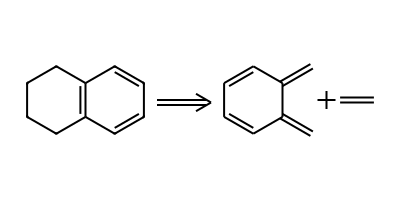

In [8]:
# Transform-based example
# Diels Alder reaction (p8, ref [1])
rxn = rdChemReactions.ReactionFromSmarts(r'C1CCC2=C(C1)C=CC=C2>>C=C1C=CC=CC1=C.C=C', useSmiles=True)
rxn_svg = create_rxn_svg(rxn, 400, 200)
SVG(add_retro_arrow(rxn_svg))

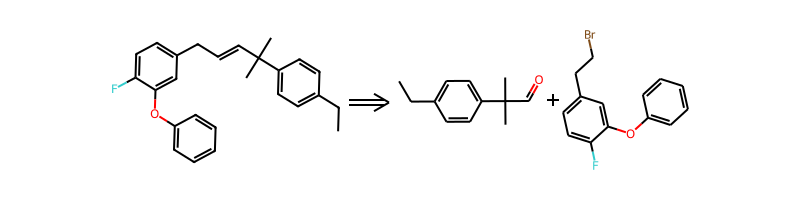

In [9]:
# Structure-based retrosynthesis example
# Focused on starting aldehyde compound
# Example from Johnson, A. P. et al. J. Chem. Inf. Comput. Sci. 1992, 32 (5), 411–417. https://doi.org/10.1021/ci00009a003.
rxn = rdChemReactions.ReactionFromSmarts(r'CCC1=CC=C(C=C1)C(C)(C)\C=C\CC1=CC=C(F)C(OC2=CC=CC=C2)=C1'
                                         r'>>CCC1=CC=C(C=C1)C(C)(C)C=O.FC1=CC=C(CCBr)C=C1OC1=CC=CC=C1', useSmiles=True)
rxn_svg = create_rxn_svg(rxn, 800, 200)
SVG(add_retro_arrow(rxn_svg))

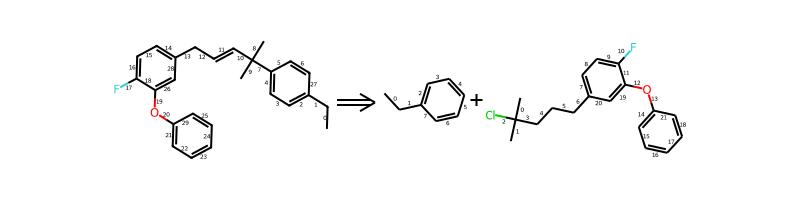

In [10]:
# Topological Transform based
# Focused on, for example, a bond disconnection
# at Bond idx 7 in Target
# Example from Johnson, A. P. et al. J. Chem. Inf. Comput. Sci. 1992, 32 (5), 411–417. https://doi.org/10.1021/ci00009a003.
rxn = rdChemReactions.ReactionFromSmarts(r'CCC1=CC=C(C=C1)C(C)(C)\C=C\CC1=CC=C(F)C(OC2=CC=CC=C2)=C1'
                                         r'>>CCC1=CC=CC=C1.CC(C)(Cl)CCCC1=CC=C(F)C(OC2=CC=CC=C2)=C1', useSmiles=True)
rxn_svg = create_rxn_svg(rxn, 800, 200, BondIdxs=True)
SVG(add_retro_arrow(rxn_svg))

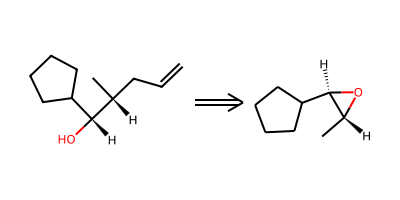

In [11]:
# Stereochemical Based
# Example from p49, ref [1]
rxn = rdChemReactions.ReactionFromSmarts(r'[H][C@@](C)(CC=C)[C@]([H])(O)C1CCCC1>>[H][C@]1(C)O[C@]1([H])C1CCCC1', useSmiles=True)
rxn_svg = create_rxn_svg(rxn, 400, 200)
SVG(add_retro_arrow(rxn_svg))

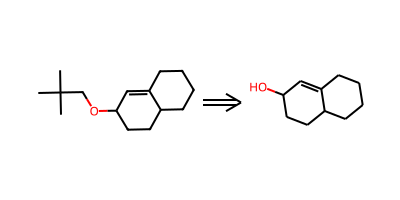

In [12]:
# Functional group Based
# Functional group interchange example
# Example from Wipke, W. T., Howe, W. J., Eds.; ACS Symposium Series,1977, 61. https://doi.org/10.1021/bk-1977-0061.
rxn = rdChemReactions.ReactionFromSmarts(r'CC(C)(C)COC1CCC2CCCCC2=C1>>OC1CCC2CCCCC2=C1', useSmiles=True)
rxn_svg = create_rxn_svg(rxn, 400, 200)
SVG(add_retro_arrow(rxn_svg))

## A very brief introduction to Computer Assisted Retrosynthesis

There are several different cheminformatics-based computer-assisted retrosynthesis approaches developed since the late 1960s. To our knowledge, the OCSS/LHASA program (Organic Chemical Simulation of Synthesis/ Logic and Heuristics Applied to Synthetic Analysis) appears to be credited as the first approach to computer-assisted retrosynthesis [4,5]. 

The main approaches, summarized in refs [6-10] include:

1. **Rule-based** - uses a set of reaction template rules describing transformations. Atom connectivity changes within the reaction are tracked. The transformations are annotated with certain allowed conditions such as structure and functional group compatibilty. Typically these rules are manually encoded [6,7]. LHASA used thousands of rule-based transformations. The language developed for the rules in LHASA, CHMTRN, was recently extended and described in detail by Judson and coworkers [11].

2. **Reaction templates** - similar to rule-based, but reaction templates are machine-extracted from a reaction dataset and may not include annotation data [6]. A method is typically applied to rank the relevancy of reaction templates for the specific prediction product [6,7]

3. **Rule free graph edit** - a template free approach where reactive sites are identified and bond changes are predicted (i.e., a sequence of graph edits). Possible products are then enumerated and ranked [8-9,12-13].

4. **Rule free sequence-to-sequence** - a template free approach where the problem is approached a natural language text based problem using the SMILES syntax. The relationship of reactants to products within the text is used for prediction. [7,8,14]

## The Computer Assisted Retrosythesis Techniques we will cover

> [!NOTE]
> We recommend reading the corresponding articles before each workshop in the series.

*Reaction Template-based approaches*

**AiZynthFinder Retrosynthesis**

* Genheden, S.; Thakkar, A.; Chadimová, V.; Reymond, J.-L.; Engkvist, O.; Bjerrum, E. AiZynthFinder: A Fast, Robust and Flexible Open-Source Software for Retrosynthetic Planning. J Cheminform 2020, 12 (1), 70. https://doi.org/10.1186/s13321-020-00472-1.

* Thakkar, A.; Kogej, T.; Reymond, J.-L.; Engkvist, O.; Bjerrum, E. J. Datasets and Their Influence on the Development of Computer Assisted Synthesis Planning Tools in the Pharmaceutical Domain. Chem. Sci. 2020, 11 (1), 154–168. https://doi.org/10.1039/C9SC04944D.

**RDChiral Templates and Retorosynthesis Similarity Ranking**

* Coley, C. W.; Rogers, L.; Green, W. H.; Jensen, K. F. Computer-Assisted Retrosynthesis Based on Molecular Similarity. ACS Cent. Sci. 2017, 3 (12), 1237–1245. https://doi.org/10.1021/acscentsci.7b00355.

* Coley, C. W.; Green, W. H.; Jensen, K. F. RDChiral: An RDKit Wrapper for Handling Stereochemistry in Retrosynthetic Template Extraction and Application. J. Chem. Inf. Model. 2019, 59 (6), 2529–2537. https://doi.org/10.1021/acs.jcim.9b00286.

**Lillymol Retrosynthesis**

* Watson, I. A.; Wang, J.; Nicolaou, C. A. A Retrosynthetic Analysis Algorithm Implementation. J Cheminform 2019, 11 (1), 1. https://doi.org/10.1186/s13321-018-0323-6.

* Nicolaou, C. A.; Watson, I. A.; LeMasters, M.; Masquelin, T.; Wang, J. Context Aware Data-Driven Retrosynthetic Analysis. J. Chem. Inf. Model. 2020, 60 (6), 2728–2738. https://doi.org/10.1021/acs.jcim.9b01141.

## References


[1] Corey, E. J., and Xue-Min Cheng. The Logic of Chemical Synthesis. New York: John Wiley & Sons, Inc., 1995. https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=26278&site=eds-live&scope=site.

[2] Warren, S. G. 1982. Organic Synthesis, the Disconnection Approach. Wiley. https://search.ebscohost.com/login.aspx?direct=true&db=cat00456a&AN=ua.288891&site=eds-live&scope=site.

[3] https://schwallergroup.github.io/ai4chem_course/

[4] Corey, E. J.; Wipke, W. T. Computer-Assisted Design of Complex Organic Syntheses: Pathways for Molecular Synthesis Can Be Devised with a Computer and Equipment for Graphical Communication. Science 1969, 166 (3902), 178–192. https://doi.org/10.1126/science.166.3902.178.

[5] Corey, E. J.; Wipke, W. T.; Cramer, R. D.; Howe, W. J. Computer-Assisted Synthetic Analysis. Facile Man-Machine Communication of Chemical Structure by Interactive Computer Graphics. J. Am. Chem. Soc. 1972, 94 (2), 421–430. https://doi.org/10.1021/ja00757a020.

[6] Shen, Y.; Borowski, J. E.; Hardy, M. A.; Sarpong, R.; Doyle, A. G.; Cernak, T. Automation and Computer-Assisted Planning for Chemical Synthesis. Nat Rev Methods Primers 2021, 1 (1), 23. https://doi.org/10.1038/s43586-021-00022-5.

[7] Schwaller, P.; Gaudin, T.; Lányi, D.; Bekas, C.; Laino, T. “Found in Translation”: Predicting Outcomes of Complex Organic Chemistry Reactions Using Neural Sequence-to-Sequence Models. Chem. Sci. 2018, 9 (28), 6091–6098. https://doi.org/10.1039/C8SC02339E.

[8] Schwaller, P.; Vaucher, A. C.; Laplaza, R.; Bunne, C.; Krause, A.; Corminboeuf, C.; Laino, T. Machine Intelligence for Chemical Reaction Space. WIREs Comput Mol Sci 2022. https://doi.org/10.1002/wcms.1604.

[9] Tu, Z.; Stuyver, T.; Coley, C. W. Predictive Chemistry: Machine Learning for Reaction Deployment, Reaction Development, and Reaction Discovery. Chem. Sci. 2023, 14 (2), 226–244. https://doi.org/10.1039/D2SC05089G.

[10] Coley, C. W.; Green, W. H.; Jensen, K. F. Machine Learning in Computer-Aided Synthesis Planning. Acc. Chem. Res. 2018, 51 (5), 1281–1289. https://doi.org/10.1021/acs.accounts.8b00087.

[11] Judson, P. N.; Ihlenfeldt, W.-D.; Patel, H.; Delannée, V.; Tarasova, N.; Nicklaus, M. C. Adapting CHMTRN (CHeMistry TRaNslator) for a New Use. J. Chem. Inf. Model. 2020, 60 (7), 3336–3341. https://doi.org/10.1021/acs.jcim.0c00448.

[12] Coley, C. W.; Jin, W.; Rogers, L.; Jamison, T. F.; Jaakkola, T. S.; Green, W. H.; Barzilay, R.; Jensen, K. F. A Graph-Convolutional Neural Network Model for the Prediction of Chemical Reactivity. Chem. Sci. 2019, 10 (2), 370–377. https://doi.org/10.1039/C8SC04228D.

[13] Sacha, M.; Błaż, M.; Byrski, P.; Dąbrowski-Tumański, P.; Chromiński, M.; Loska, R.; Włodarczyk-Pruszyński, P.; Jastrzębski, S. Molecule Edit Graph Attention Network: Modeling Chemical Reactions as Sequences of Graph Edits. J. Chem. Inf. Model. 2021, 61 (7), 3273–3284. https://doi.org/10.1021/acs.jcim.1c00537.

[14] Liu, B.; Ramsundar, B.; Kawthekar, P.; Shi, J.; Gomes, J.; Luu Nguyen, Q.; Ho, S.; Sloane, J.; Wender, P.; Pande, V. Retrosynthetic Reaction Prediction Using Neural Sequence-to-Sequence Models. ACS Cent. Sci. 2017, 3 (10), 1103–1113. https://doi.org/10.1021/acscentsci.7b00303.


